## **BLACK FRIDAY SALES ANALYSIS**
Author: Felicia Andrea Tandoko

#### **DATA EXPLORATION**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("blackfriday.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [4]:
df.shape

(550068, 12)

In [5]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [6]:
df.rename(columns={'User_ID':'UserID', 'Product_ID':'ProductID', 'City_Category':'City', 'Stay_In_Current_City_Years':'Stay',
                   'Marital_Status':'Marital', 'Product_Category_1':'Product1', 'Product_Category_2':'Product2',
                   'Product_Category_3':'Product3'}, inplace=True)

In [7]:
df.describe()

,UserID,Occupation,Marital,Product1,Product2,Product3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [8]:
df.nunique()

,0
UserID,5891
ProductID,3631
Gender,2
Age,7
Occupation,21
City,3
Stay,5
Marital,2
Product1,20
Product2,17


#### **DATA CLEANING**

In [9]:
df.isnull().sum()

,0
UserID,0
ProductID,0
Gender,0
Age,0
Occupation,0
City,0
Stay,0
Marital,0
Product1,0
Product2,173638


In [10]:
check = ['Product2', 'Product3']

for i in check:
  percentage = df[i].isnull().sum()/df.shape[0]*100
  print(f"Missing percentage in {i}: {percentage:.2f}%")

Missing percentage in Product2: 31.57%
Missing percentage in Product3: 69.67%


Based on the missing percentage above, I will not handle missing values in Product3 since the missing percentage is above 50%. Therefore, I will drop this column.

<Axes: xlabel='Product2'>

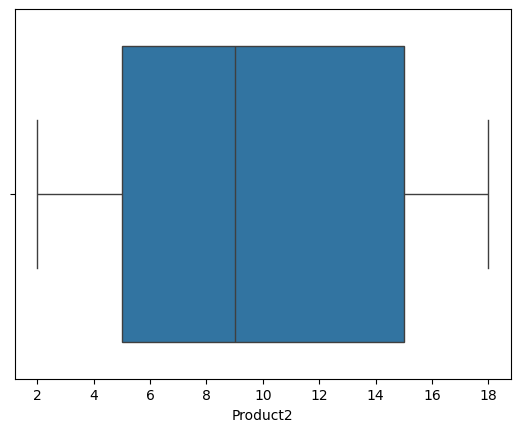

In [11]:
sns.boxplot(x=df['Product2'])

In [12]:
Product2_mean = df['Product2'].mean()
Product2_mean

9.842329251122386

In [13]:
df['Product2'] = df['Product2'].fillna(Product2_mean)

In [14]:
df = df.drop('Product3', axis=1)

In [15]:
df.isnull().sum()

,0
UserID,0
ProductID,0
Gender,0
Age,0
Occupation,0
City,0
Stay,0
Marital,0
Product1,0
Product2,0


#### **FEATURE SELECTION**

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   UserID      550068 non-null  int64  
 1   ProductID   550068 non-null  object 
 2   Gender      550068 non-null  object 
 3   Age         550068 non-null  object 
 4   Occupation  550068 non-null  int64  
 5   City        550068 non-null  object 
 6   Stay        550068 non-null  object 
 7   Marital     550068 non-null  int64  
 8   Product1    550068 non-null  int64  
 9   Product2    550068 non-null  float64
 10  Purchase    550068 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 46.2+ MB


I will drop 'UserID' and 'ProductID' columns since they are not relevant in this analysis and prediction.

In [17]:
df = df.drop(['UserID', 'ProductID'], axis=1)

In [18]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'City', 'Stay', 'Marital', 'Product1',
       'Product2', 'Purchase'],
      dtype='object')

#### **DATA VISUALIZATION**

##### **Gender Distribution**

In [19]:
df['Gender'].value_counts()

,count
Gender,
M,414259
F,135809


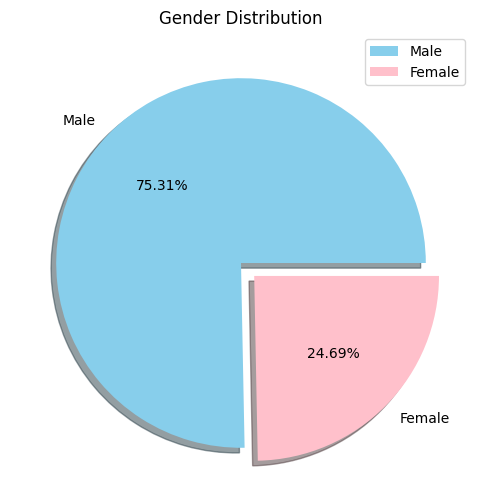

In [20]:
value = df['Gender'].value_counts()
labels = ['Male', 'Female']
colors = ['skyblue', 'pink']
explode = [0, 0.1]

plt.figure(figsize=(6, 6))
plt.pie(value, colors=colors, labels=labels, shadow=True, explode=explode, autopct='%.2f%%')
plt.title('Gender Distribution')
plt.legend()
plt.show()

##### **Age Distribution**

<ipython-input-21-c685624ee347>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_counts.index, y=age_counts.values, palette='viridis')


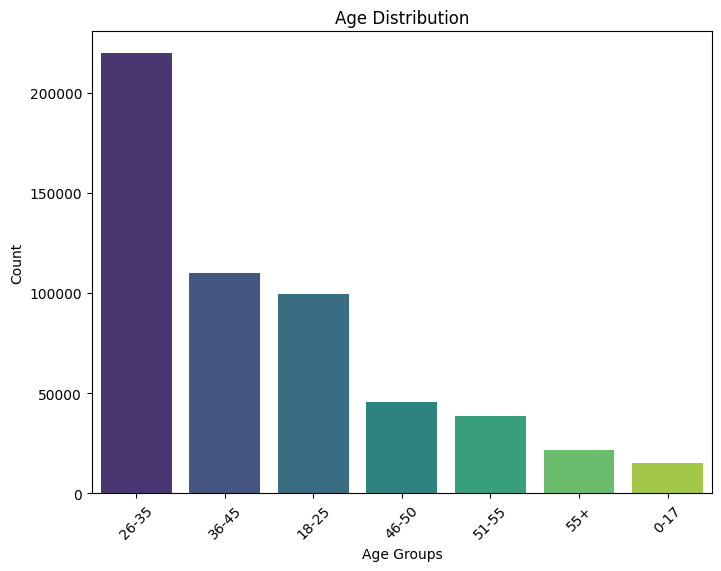

In [21]:
age_counts = df['Age'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=age_counts.index, y=age_counts.values, palette='viridis')
plt.title('Age Distribution')
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

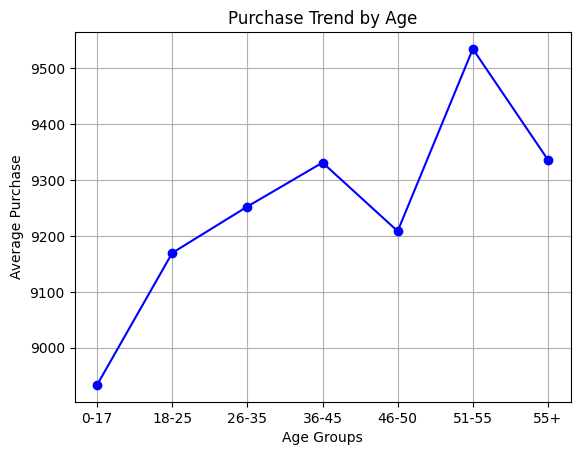

In [22]:
age_purchase = df.groupby('Age')['Purchase'].mean()

plt.figure()
plt.plot(age_purchase.index, age_purchase.values, marker='o', linestyle='-', color='blue')
plt.title('Purchase Trend by Age')
plt.xlabel('Age Groups')
plt.ylabel('Average Purchase')
plt.grid()
plt.show()

##### **City Category Distribution**

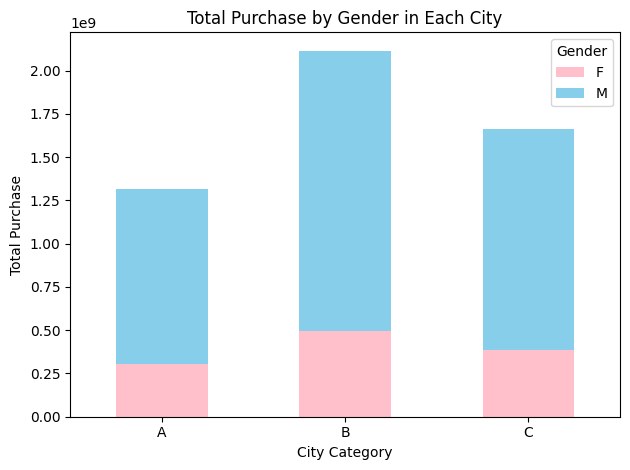

In [23]:
city_gender = df.groupby(['City', 'Gender'])['Purchase'].sum().unstack()

city_gender.plot(kind='bar', stacked=True, color=['pink', 'skyblue'])
plt.title('Total Purchase by Gender in Each City')
plt.xlabel('City Category')
plt.ylabel('Total Purchase')
plt.legend(title='Gender')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<ipython-input-24-13e1f1487f3f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_purchase.index, y=city_purchase.values, palette='viridis')


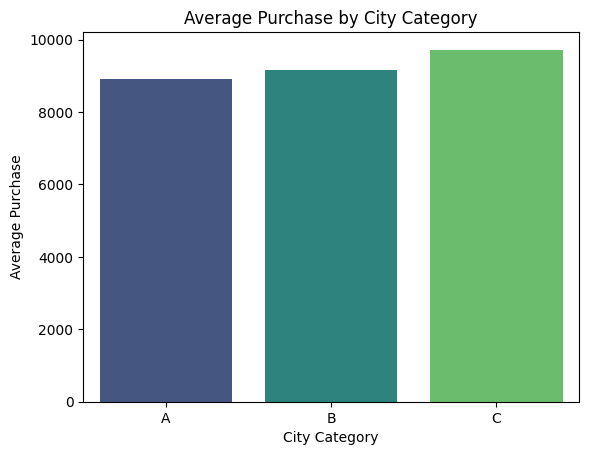

In [24]:
city_purchase = df.groupby('City')['Purchase'].mean()

plt.figure()
sns.barplot(x=city_purchase.index, y=city_purchase.values, palette='viridis')
plt.title('Average Purchase by City Category')
plt.xlabel('City Category')
plt.ylabel('Average Purchase')
plt.show()

##### **Occupation Distribution**

<ipython-input-25-94d309431610>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=occupation_counts.index, y=occupation_counts.values, palette='viridis')


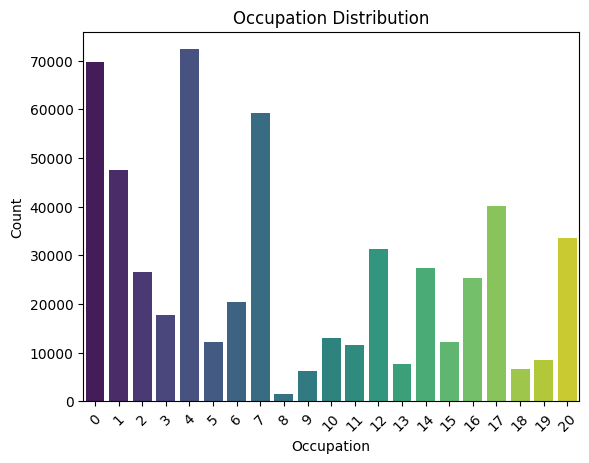

In [25]:
occupation_counts = df['Occupation'].value_counts()

plt.figure()
sns.barplot(x=occupation_counts.index, y=occupation_counts.values, palette='viridis')
plt.title('Occupation Distribution')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

##### **Marital Distribution**

<ipython-input-26-19cd825ea8fa>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=marital_counts.index, y=marital_counts.values, palette='viridis')


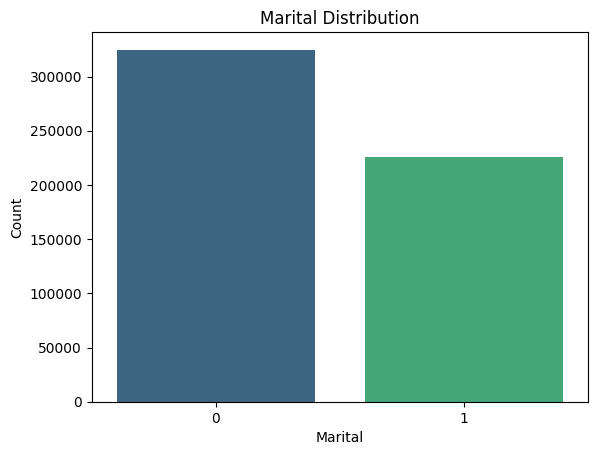

In [26]:
marital_counts = df['Marital'].value_counts()

plt.figure()
sns.barplot(x=marital_counts.index, y=marital_counts.values, palette='viridis')
plt.title('Marital Distribution')
plt.xlabel('Marital')
plt.ylabel('Count')
plt.xticks()
plt.show()

##### **Years Stay Distribution**

<ipython-input-27-76f5bae19053>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stay_counts.index, y=stay_counts.values, palette='viridis')


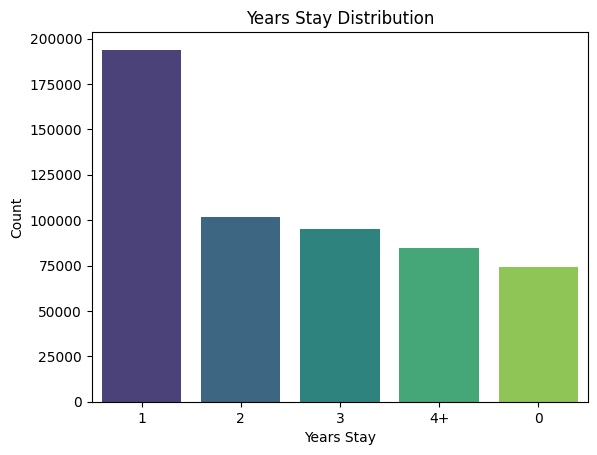

In [27]:
stay_counts = df['Stay'].value_counts()

plt.figure()
sns.barplot(x=stay_counts.index, y=stay_counts.values, palette='viridis')
plt.title('Years Stay Distribution')
plt.xlabel('Years Stay')
plt.ylabel('Count')
plt.xticks()
plt.show()

##### **Product Category Distribution**

<ipython-input-28-208a80c857a1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product1_counts.index, y=product1_counts.values, palette='viridis')


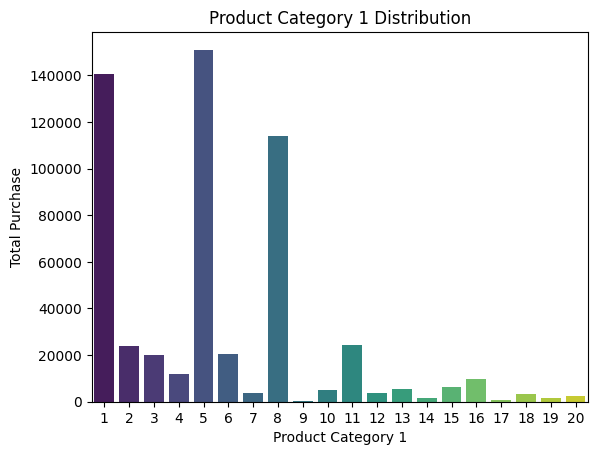

In [28]:
product1_counts = df['Product1'].value_counts()

plt.figure()
sns.barplot(x=product1_counts.index, y=product1_counts.values, palette='viridis')
plt.title('Product Category 1 Distribution')
plt.xlabel('Product Category 1')
plt.ylabel('Total Purchase')
plt.show()

<ipython-input-29-c886b26131cc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product2_counts.index, y=product2_counts.values, palette='viridis')


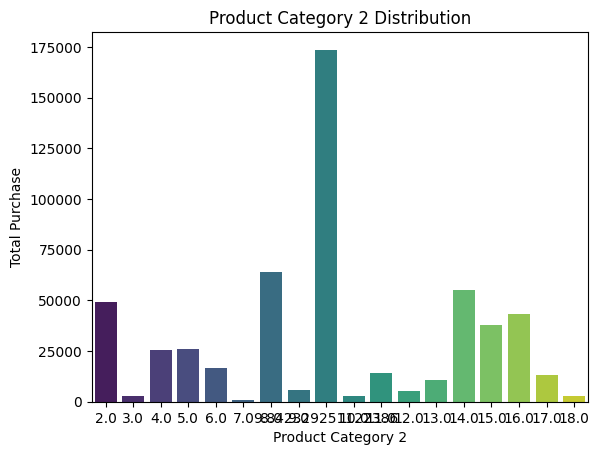

In [29]:
product2_counts = df['Product2'].value_counts()

plt.figure()
sns.barplot(x=product2_counts.index, y=product2_counts.values, palette='viridis')
plt.title('Product Category 2 Distribution')
plt.xlabel('Product Category 2')
plt.ylabel('Total Purchase')
plt.show()

##### **Top 3 Product Category 1 Distribution**

In [30]:
top_products1 = [1, 5, 8]

top_products1_data = df[df['Product1'].isin(top_products1)]

top_products1_data.head()

,Gender,Age,Occupation,City,Stay,Marital,Product1,Product2,Purchase
1,F,0-17,10,A,2,0,1,6.000000,15200
4,M,55+,16,C,4+,0,8,9.842329,7969
5,M,26-35,15,A,3,0,1,2.000000,15227
6,M,46-50,7,B,2,1,1,8.000000,19215
7,M,46-50,7,B,2,1,1,15.000000,15854


Gender        F       M
Product1               
1         24831  115547
5         41961  108972
8         33558   80367


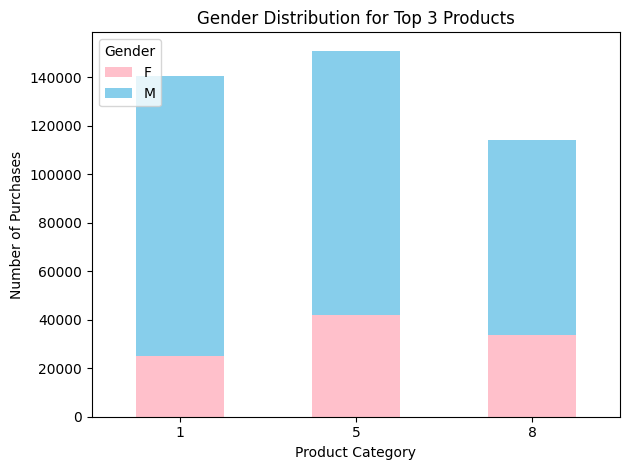

In [31]:
gender_distribution = top_products1_data.groupby(['Product1', 'Gender']).size().unstack()

print(gender_distribution)

gender_distribution.plot(kind='bar', stacked=True, color=['pink', 'skyblue'])
plt.title('Gender Distribution for Top 3 Products')
plt.xlabel('Product Category')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=0)
plt.legend(title='Gender', loc='upper left')
plt.tight_layout()
plt.show()

Age       0-17  18-25  26-35  36-45  46-50  51-55   55+
Product1                                               
1         3585  26962  58249  27648  10474   9049  4411
5         4330  28522  61473  29377  11971   9893  5367
8         2258  17911  44256  23296  10656   9340  6208


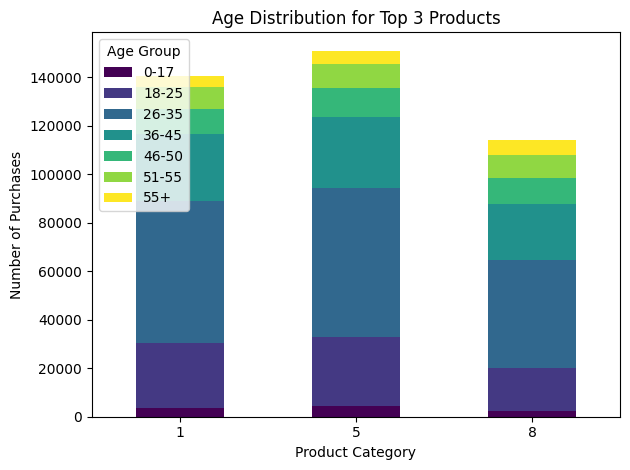

In [32]:
age_distribution = top_products1_data.groupby(['Product1', 'Age']).size().unstack()

print(age_distribution)

age_distribution.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Age Distribution for Top 3 Products')
plt.xlabel('Product Category')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=0)
plt.legend(title='Age Group', loc='upper left')
plt.tight_layout()
plt.show()

##### **Numerical Variables Distribution**

In [33]:
num_col = df.select_dtypes(include = ['int', 'float']).columns
cat_col = df.select_dtypes(include = ['object', 'category']).columns

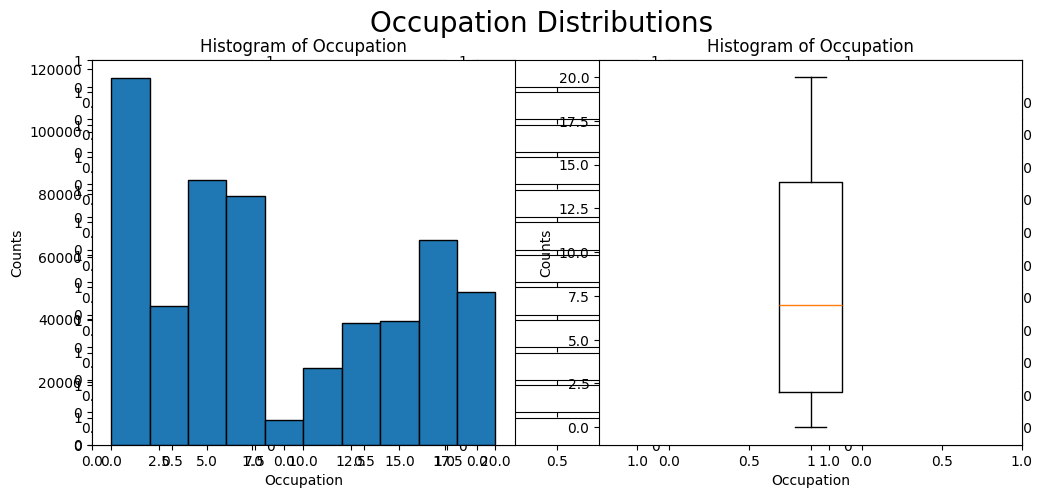

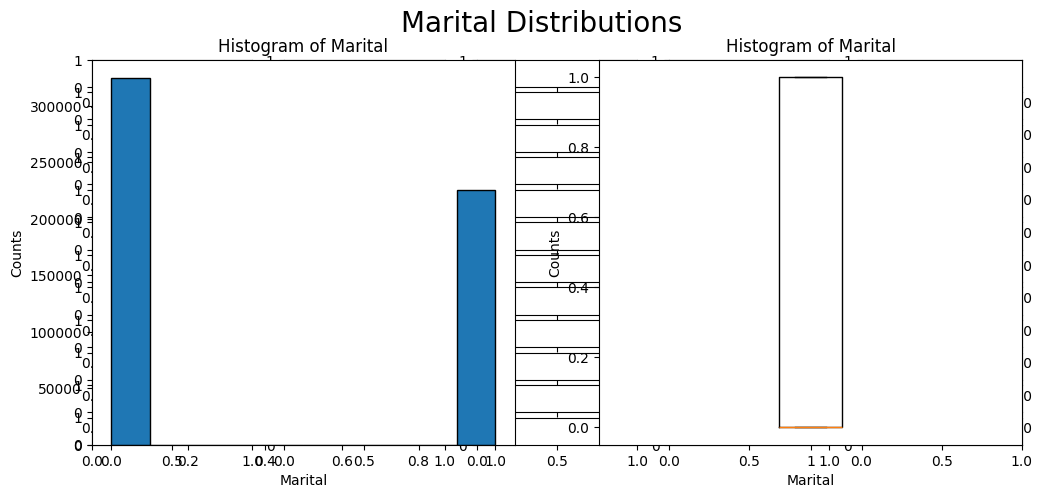

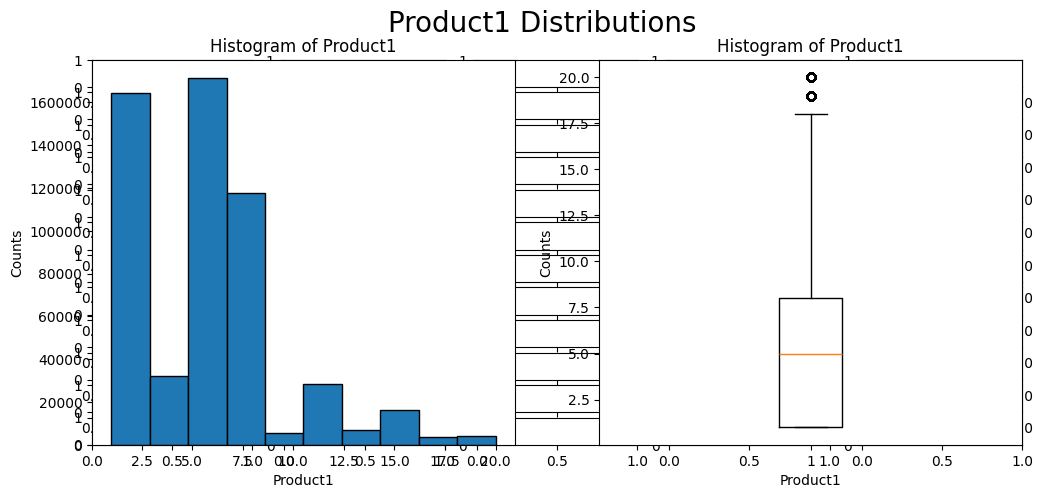

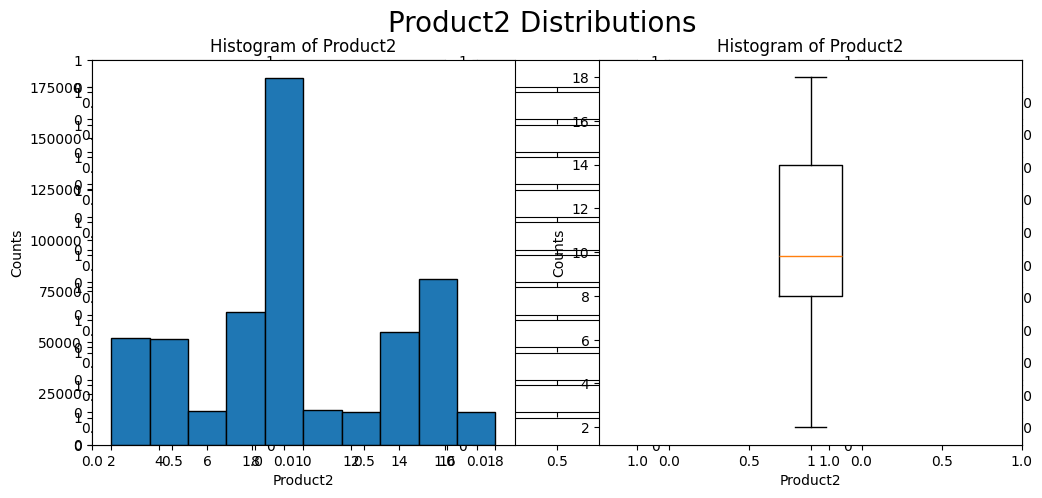

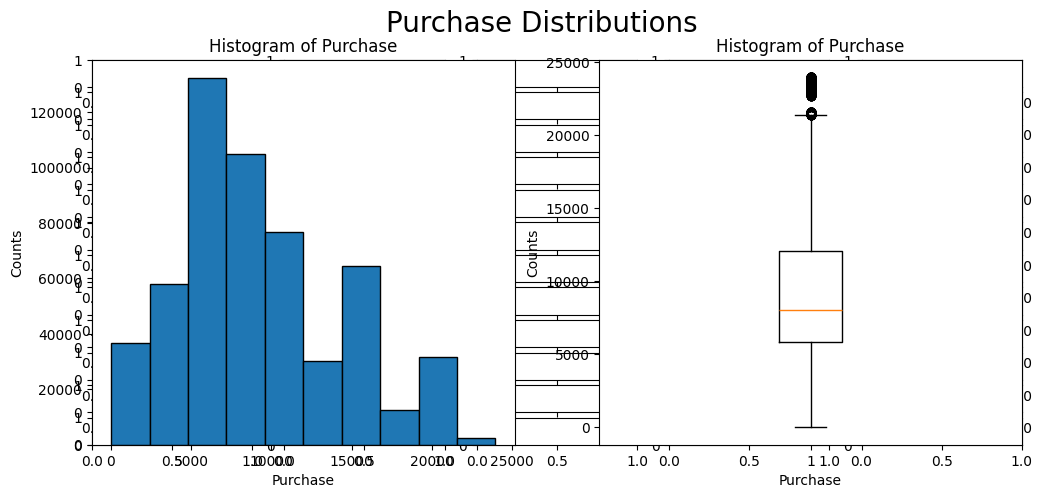

In [34]:
for col in num_col:
    fig,ax = plt.subplots(12, 5, figsize=(12, 5))
    fig.suptitle(f"{col} Distributions", fontsize = 20)

    plt.subplot(1,2,1)
    plt.hist(df[col], edgecolor = 'black')
    plt.xlabel(col)
    plt.ylabel("Counts")
    plt.title(f"Histogram of {col}")

    plt.subplot(1,2,2)
    plt.boxplot(df[col])
    plt.xlabel(col)
    plt.ylabel("Counts")
    plt.title(f"Histogram of {col}")

    plt.show()

#### **SPLITTING**

Our target variable is 'Purchase'. Therefore, I will separate 'Purchase' column with the other columns.

In [35]:
from sklearn.model_selection import train_test_split

x = df.drop('Purchase', axis = 1)
y = df['Purchase']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)

In [36]:
x_train.shape

(440054, 8)

In [37]:
x_test.shape

(110014, 8)

#### **FEATURE ENGINEERING**

##### **One Hot Encoding**

In [38]:
num_col_x = x_train.select_dtypes(include = ['int', 'float']).columns
cat_col_x = x_train.select_dtypes(include = ['object', 'category']).columns

In [39]:
num_col_x

Index(['Occupation', 'Marital', 'Product1', 'Product2'], dtype='object')

In [40]:
cat_col_x

Index(['Gender', 'Age', 'City', 'Stay'], dtype='object')

In [42]:
onehot_encoded = pd.get_dummies(x_train[cat_col_x])

x_train = pd.concat([x_train.drop(cat_col_x, axis = 1), onehot_encoded], axis = 1)

In [43]:
onehot_encoded = pd.get_dummies(x_test[cat_col_x])

x_test = pd.concat([x_test.drop(cat_col_x, axis = 1), onehot_encoded], axis = 1)

In [44]:
x_train.head()

,Occupation,Marital,Product1,Product2,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,...,Age_51-55,Age_55+,City_A,City_B,City_C,Stay_0,Stay_1,Stay_2,Stay_3,Stay_4+
401980,7,1,8,9.842329,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
368189,14,0,8,17.000000,False,True,False,False,True,False,...,False,False,False,True,False,False,False,True,False,False
181444,7,0,8,9.842329,False,True,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
238822,20,1,5,8.000000,False,True,False,True,False,False,...,False,False,True,False,False,False,False,False,False,True
127422,0,0,5,9.842329,True,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,True


In [45]:
x_train.columns

Index(['Occupation', 'Marital', 'Product1', 'Product2', 'Gender_F', 'Gender_M',
       'Age_0-17', 'Age_18-25', 'Age_26-35', 'Age_36-45', 'Age_46-50',
       'Age_51-55', 'Age_55+', 'City_A', 'City_B', 'City_C', 'Stay_0',
       'Stay_1', 'Stay_2', 'Stay_3', 'Stay_4+'],
      dtype='object')

In [46]:
x_test.columns

Index(['Occupation', 'Marital', 'Product1', 'Product2', 'Gender_F', 'Gender_M',
       'Age_0-17', 'Age_18-25', 'Age_26-35', 'Age_36-45', 'Age_46-50',
       'Age_51-55', 'Age_55+', 'City_A', 'City_B', 'City_C', 'Stay_0',
       'Stay_1', 'Stay_2', 'Stay_3', 'Stay_4+'],
      dtype='object')

#### **MODELLING**

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_model(y_test, y_pred, model):
    print(f"\n{model} Performance:")
    print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.2f}")
    print(f"Root Mean Squared Error (RMSE): {mean_squared_error(y_test, y_pred, squared=False):.2f}")
    print(f"R² Score: {r2_score(y_test, y_pred):.2f}")

##### **Linear Regression**

In [48]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
evaluate_model(y_test, lr_pred, "Linear Regression")


Linear Regression Performance:
Mean Absolute Error (MAE): 3597.20
Mean Squared Error (MSE): 22025570.67
Root Mean Squared Error (RMSE): 4693.14
R² Score: 0.13


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


##### **Random Forest**

In [49]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)
evaluate_model(y_test, rf_pred, "Random Forest")


Random Forest Performance:
Mean Absolute Error (MAE): 2198.03
Mean Squared Error (MSE): 9047454.67
Root Mean Squared Error (RMSE): 3007.90
R² Score: 0.64


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


##### **XGBoost**

In [50]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)
evaluate_model(y_test, xgb_pred, "XGBoost")


XGBoost Performance:
Mean Absolute Error (MAE): 2228.00
Mean Squared Error (MSE): 8751834.88
Root Mean Squared Error (RMSE): 2958.35
R² Score: 0.65


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


##### **Deep Learning**

In [51]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

def build_model(input_dim):
    model = Sequential([
        Dense(128, input_dim=input_dim, activation='relu'),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

input_dim = x_train.shape[1]

In [52]:
model = build_model(input_dim)
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=20,
    batch_size=32,
    verbose=1
)

y_pred = model.predict(x_test).flatten()
evaluate_model(y_test, y_pred, "Deep Learning")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
13752/13752 ━━━━━━━━━━━━━━━━━━━━ 46s 3ms/step - loss: 29989774.0000 - mae: 4072.2957 - val_loss: 17852378.0000 - val_mae: 3107.5950
Epoch 2/20
13752/13752 ━━━━━━━━━━━━━━━━━━━━ 81s 3ms/step - loss: 19035560.0000 - mae: 3209.5259 - val_loss: 17797146.0000 - val_mae: 3093.2659
Epoch 3/20
13752/13752 ━━━━━━━━━━━━━━━━━━━━ 71s 2ms/step - loss: 18817330.0000 - mae: 3190.2737 - val_loss: 17804904.0000 - val_mae: 3087.4639
Epoch 4/20
13752/13752 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - loss: 18819022.0000 - mae: 3188.6804 - val_loss: 17744642.0000 - val_mae: 3078.6260
Epoch 5/20
13752/13752 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - loss: 18802784.0000 - mae: 3186.9565 - val_loss: 17813510.0000 - val_mae: 3083.4519
Epoch 6/20
13752/13752 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - loss: 18829238.0000 - mae: 3185.1790 - val_loss: 17628710.0000 - val_mae: 3067.6384
Epoch 7/20
13752/13752 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - loss: 18655850.0000 - mae: 3172.2227 - val_loss: 17424092.0000 - val_mae: 3052.7485

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### **ANALYSIS AND CONCLUSION**

Based on the data analysis, it can be concluded that product purchases are dominantly made by **males**, with the age group **26-35 years** showing the highest purchase frequency. However, the highest average purchase was recorded in the **51-55 years** age group. In terms of city categories, **Category B** had similar purchase patterns across all categories, with minimal differences in average purchases. For occupation, **Occupation 4 and Occupation 0** showed the highest purchase rates, although the difference between them was not significant. There was no noticeable difference between the marital statuses of single (0) and married (1) regarding purchase behavior. Additionally, individuals who have lived in the city for **1 year** had the highest purchase frequency.

For Product Category 1, the most **frequently purchased products were 1, 5, and 8**, with the majority of buyers being **males aged between 26-45 years**. On the other hand, Product **Category 2 had Product 9** as the most popular item among buyers.

Based on the insights from the data analysis, here are some strategic recommendations that could be valuable for the company:

1. **Targeted marketing campaigns** for males (age 26-35)
2. **Create loyalty programs** or targeted offers to customers aged 51-55 or lived in the city for 1 year, encouraging repeat purchases
3. **Emphasize top-selling products** (product 1, 5, 8 from product category 1)
4. **Promote product** 9 in category 2

After testing different models to predict customer purchases, here’s how they performed:

- **Linear Regression**: This simple model didn’t perform well (R²: 0.13) and had high errors (RMSE: 4693.14). Therefore, it’s not able to capture the complexity of the data.
- **Random Forest**: Showed much better results (R²: 0.64) with lower errors (RMSE: 3007.90). It works well but isn’t as good as XGBoost.
- **XGBoost**: The best model overall (R²: 0.65) with the smallest errors (RMSE: 2958.35, MAE: 2228.00). It handled the data patterns and relationships most effectively.
- **Deep Learning**: Performed okay (R²: 0.42) but had higher errors than XGBoost (RMSE: 3822.24, MAE: 2792.63). Deep learning didn’t outperform tree-based models here because the data is better suited for simpler methods.


From these results, we can conclude that **XGBoost is the best model**, as it’s the most accurate and reliable for this dataset.
Deep learning might improve with larger or more complex data, but for now, XGBoost is the better choice.